Chuẩn hóa dữ liệu

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = {'weight':[300, 250, 800],
        'price':[3, 2, 5]}
df = pd.DataFrame(data)
print(df)

   weight  price
0     300      3
1     250      2
2     800      5


In [ ]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
print(normalized_data)

[[0.09090909 0.33333333]
 [0.         0.        ]
 [1.         1.        ]]


In [ ]:
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
print(normalized_df)

     weight     price
0  0.090909  0.333333
1  0.000000  0.000000
2  1.000000  1.000000


VD_chuẩn hóa minmax:

In [ ]:
# minmax_handmade
def minmaxscale(df):
  col_names = df.columns
  sl_col= len(col_names)
  max_val = df.max(axis=0)
  min_val = df.min(axis=0)
  for i in range (sl_col):
    j=0
    for val in df[col_names[i]]:
      valn= (val-min_val[i])/(max_val[i]-min_val[i])
      df[col_names[i]][j]=round(valn,2)
      j=j+1


In [ ]:
def minmaxscale_arr(arr):
  max_val=arr.max()
  min_val=arr.min()
  sl_a=len(arr)
  for i in range (sl_a):
    arr[i]= (arr[i]-min_val)/(max_val-min_val)
    arr[i]=round(z,2)

In [ ]:
# df2 = pd.read_csv('du_lieu.csv')
data = {'weight':[300, 250, 800],
        'price':[3, 2, 5]}
df = pd.DataFrame(data)
print(df)

   weight  price
0     300      3
1     250      2
2     800      5


In [ ]:
minmaxscale(df)
print(df)

   weight  price
0    0.09   0.33
1    0.00   0.00
2    1.00   1.00


<ipython-input-52-7fe85b884068>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_names[i]][j]=round(valn,2)


Chuẩn hóa Z-core:

In [ ]:
import numpy as np
import scipy.stats as stats
import math

In [ ]:
data = np.array([6, 7, 7, 12, 13, 13, 15, 16, 19, 22])

In [ ]:
zscores = stats.zscore(data)
print(zscores)

[-1.39443338 -1.19522861 -1.19522861 -0.19920477  0.          0.
  0.39840954  0.5976143   1.19522861  1.79284291]


In [ ]:
# Loading a Sample Pandas Dataframe
import pandas as pd

dfz = pd.DataFrame.from_dict({
    'Name': ['Nik', 'Kate', 'Joe', 'Mitch', 'Alana'],
    'Age': [32, 30, 67, 34, 20],
    'Income': [80000, 90000, 45000, 23000, 12000],
    'Education' : [5, 7, 3, 4, 4]
})

print(dfz.head())

    Name  Age  Income  Education
0    Nik   32   80000          5
1   Kate   30   90000          7
2    Joe   67   45000          3
3  Mitch   34   23000          4
4  Alana   20   12000          4


In [ ]:
dfz['Income zscore'] = stats.zscore(dfz['Income'])
print(dfz.head())

    Name  Age  Income  Education  Income zscore
0    Nik   32   80000          5       0.978700
1   Kate   30   90000          7       1.304934
2    Joe   67   45000          3      -0.163117
3  Mitch   34   23000          4      -0.880830
4  Alana   20   12000          4      -1.239687


In [ ]:
dfz = dfz.select_dtypes(include='number').apply(stats.zscore)
print(dfz.head())

        Age    Income  Education  Income zscore
0 -0.288493  0.978700   0.294884       0.978700
1 -0.413925  1.304934   1.769303       1.304934
2  1.906565 -0.163117  -1.179536      -0.163117
3 -0.163061 -0.880830  -0.442326      -0.880830
4 -1.041085 -1.239687  -0.442326      -1.239687


VD_chuẩn hóa z-core:

In [ ]:
def z_core(df):
  col_names = df.columns
  sl_col= len(col_names)
  for i in range (sl_col):
    j=0
    tb=0
    e=0
    k=0
    for val in df[col_names[i]]:
      tb=tb+val
      j=j+1
    tb=tb/j

    for val in df[col_names[i]]:
      e=e+pow(val-tb,2)
    e=math.sqrt((1/j)*e)

    for val in df[col_names[i]]:
      z= (val-tb)/e
      df[col_names[i]][k]=round(z,2)
      k=k+1

In [ ]:
def z_core_array(arr):
  sl_a=len(arr)
  tb=0
  e=0
  for val in arr:
    tb=tb+ val
  tb=tb/sl_a
  for val in arr:
    e=e+pow(val-tb,2)
  e=math.sqrt((1/sl_a)*e)
  for i in range (sl_a):
    z= (arr[i]-tb)/e
    arr[i]=round(z,2)


In [ ]:
dfz = pd.DataFrame.from_dict({
    'Name': ['Nik', 'Kate', 'Joe', 'Mitch', 'Alana'],
    'Age': [32, 30, 67, 34, 20],
    'Income': [80000, 90000, 45000, 23000, 12000],
    'Education' : [5, 7, 3, 4, 4]
})

print(dfz.head())

    Name  Age  Income  Education
0    Nik   32   80000          5
1   Kate   30   90000          7
2    Joe   67   45000          3
3  Mitch   34   23000          4
4  Alana   20   12000          4


In [ ]:
dfz1 = dfz.select_dtypes(include='number').copy()
# dfz1 = dfz1.applymap(z_core)
z_core(dfz1)
print(dfz1.head())

    Age  Income  Education
0 -0.29    0.98       0.29
1 -0.41    1.30       1.77
2  1.91   -0.16      -1.18
3 -0.16   -0.88      -0.44
4 -1.04   -1.24      -0.44


<ipython-input-62-bee8f4d5cc85>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_names[i]][k]=round(z,2)


Cây quyết định:

In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
class Tree:
  def __init__(self,observationIDs,features,currLvl=0,subTree={},bestFeature=None,majorityLabel=None,parentMajorityLabel=None):
    self.observationIDs = observationIDs
    self.features = features
    self.currLvl = currLvl
    self.subTree = subTree
    self.bestFeature = bestFeature
    self.majorityLabel = majorityLabel
    self.parentMajorityLabel = parentMajorityLabel
    self.setBestFeatureID(bestFeature)

  def setBestFeatureID(self, feature):
    idx = None
    if feature == 'Is_Home_or_Away':
      idx = 0
    elif feature == 'Is_Opponent_in_AP25_Preseason':
      idx = 1
    else:
      idx = 2
    self.bestFeatureID = int(idx)

In [ ]:
def predict(tree, obs):
	if tree.bestFeature == None:
		return tree.majorityLabel
	featVal = obs[tree.bestFeatureID]
	if not featVal in tree.subTree: # val with no subtree
		return tree.majorityLabel
	else: # recurse on subtree
		return predict(tree.subTree[featVal],obs)

In [ ]:
def displayDecisionTree(tree):
	print('\t'*tree.currLvl + '(lvl {}) {}'.format(tree.currLvl,tree.majorityLabel))
	if tree.bestFeature == None:
		return

	print('\t'*tree.currLvl + '{}'.format(tree.bestFeature) + ': ')
	for [val,subTree] in sorted(tree.subTree.items()):
		print('\t'*(tree.currLvl+1) + 'choice: {}'.format(val))
		displayDecisionTree(subTree)

In [ ]:
def Entropy(ns):
	entropy = 0.0
	total = sum(ns)
	for x in ns:
		entropy += -1.0*x/total*math.log(1.0*x/total,2)
	return entropy

In [ ]:
def IG(observationIDs, feature,dfdata):
	# get smaller dataframe
	df = dfdata.loc[list(observationIDs)]
	# populate counts for Wins/Losses for each category of the feature
	labelCountDict = {}
	valueLabelCountDict = {}
	for index, row in df.iterrows():
		label = row['Label']
		if not label in labelCountDict:
			labelCountDict[label] = 0 # this specific label was not found so insert 0 count
		labelCountDict[label] += 1
		featureValue = row[feature]
		if not featureValue in valueLabelCountDict:
			valueLabelCountDict[featureValue] = {} # this specific feature value not found so insert empty dict
		if not label in valueLabelCountDict[featureValue]:
			valueLabelCountDict[featureValue][label] = 0 # this specific label was not found for this feature value so insert 0 count
		valueLabelCountDict[featureValue][label] += 1

	ns = []
	for [label,count] in labelCountDict.items():
		ns.append(count)

	H_Y = Entropy(ns)

	H_Y_X = 0.0
	for [featureValue, labelCountDict] in valueLabelCountDict.items():
		nsHYX = []
		for [label,count] in labelCountDict.items():
			nsHYX.append(count)
		H_Y_X += 1.0*sum(nsHYX)/len(df)*Entropy(nsHYX)
	return H_Y - H_Y_X

In [ ]:
def GR(observationIDs, feature,dfdata):
	ig = IG(observationIDs,feature,dfdata)
	if ig == 0:
		return 0
	df = dfdata.loc[list(observationIDs)]
	valueLabelDict = {}
	for index, row in df.iterrows():
		label = row['Label']
		featureValue = row[feature]
		if featureValue not in valueLabelDict:
			valueLabelDict[featureValue] = 0
		valueLabelDict[featureValue] += 1
	ns = []
	for [val,count] in valueLabelDict.items():
		ns.append(count)
	ent = Entropy(ns)
	return float(ig)/ent

In [ ]:
def fillDecisionTree(tree,decisionTreeAlgo,dfdata):
	# find the majorityLabel
	df = dfdata.loc[list(tree.observationIDs)] # smaller df
	counts = df['Label'].value_counts()
	majorityLabel = df['Label'].value_counts().idxmax()
	if len(counts) > 1:
		if counts['Win'] == counts['Lose']:
			majorityLabel = tree.parentMajorityLabel
	tree.majorityLabel = majorityLabel

	# exit if only one label
	if len(counts) == 1:
		return
	# exit if no features left
	if len(tree.features) == 0:
		return

	# find best feature
	featureValueDict = {}
	for feature in tree.features:
		if decisionTreeAlgo == 'ID3':
			metricScore = IG(tree.observationIDs,feature,dfdata)
		if decisionTreeAlgo == 'C45':
			metricScore = GR(tree.observationIDs,feature,dfdata)
		featureValueDict[feature] = metricScore
	bestFeature, bestFeatureValue = sorted(featureValueDict.items(),reverse=True)[0]
	# exit if IG or GR is 0
	if bestFeatureValue == 0.0:
		return
	tree.bestFeature = bestFeature

	# find subset of features
	subFeatures = set()
	for feature in tree.features:
		if feature == bestFeature: # skip the current best feature
			continue
		subFeatures.add(feature)

	# find best feature id
	bestFeatureIdx = 0
	if bestFeature == 'Is_Home_or_Away':
		bestFeatureIdx = 0
	elif bestFeature == 'Is_Opponent_in_AP25_Preseason':
		bestFeatureIdx = 1
	else:
		bestFeatureIdx = 2

	# find subset of observations
	subObservationsDict = {}
	for obs in tree.observationIDs:
		val = dfdata.values[obs][bestFeatureIdx]
		if not val in subObservationsDict:
			subObservationsDict[val] = set()
		subObservationsDict[val].add(obs)

	for [val,obs] in subObservationsDict.items():

		tree.subTree[val] = Tree(obs, subFeatures, tree.currLvl + 1,{},None,None,majorityLabel)

		fillDecisionTree(tree.subTree[val],decisionTreeAlgo,dfdata)

In [ ]:
initialObservationIDs = set(range(len(dfdata)))
initialFeatures = set(dfdata.columns.values[:-1])

In [ ]:
algoChoice = str(input(("Which decision tree algorithm would you like to use ('ID3' or 'C45)?")))
if algoChoice not in {'ID3','C45'}:
	print("Invalid algorithm choice. You must choose 'ID3' or 'C45'")
	exit()

print("choice: {}".format(algoChoice))
# algoChoice = str(input(("Which decision tree algorithm would you like to use ('ID3' or 'C45)?")))
# if algoChoice not in {'ID3','C45'}:
# 	print("Invalid algorithm choice. You must choose 'ID3' or 'C45'")
# 	exit()
algoChoice = 'ID3'
print("choice: {}".format(algoChoice))

Which decision tree algorithm would you like to use ('ID3' or 'C45)?C45
choice: C45


In [ ]:
MyTree = Tree(initialObservationIDs,initialFeatures)
fillDecisionTree(MyTree,algoChoice,dfdata)

print('My Decision Tree:')
displayDecisionTree(MyTree)

dùng hàm vẽ cây:

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

In [ ]:
dfdata = pd.read_csv('/content/drive/MyDrive/Dataset-football-train.txt',sep='\t')

In [ ]:
dfdata=dfdata[['Is_Home_or_Away','Is_Opponent_in_AP25_Preseason','Media','Label']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfdata['Is_Home_or_Away']=le.fit_transform(dfdata['Is_Home_or_Away'])
dfdata['Is_Opponent_in_AP25_Preseason']=le.fit_transform(dfdata['Is_Opponent_in_AP25_Preseason'])
dfdata['Media']=le.fit_transform(dfdata['Media'])

In [ ]:
dt = DecisionTreeClassifier()
x=dfdata[['Is_Home_or_Away','Is_Opponent_in_AP25_Preseason','Media']]
y=dfdata[['Label']]
dt.fit(x, y)

DecisionTreeClassifier()

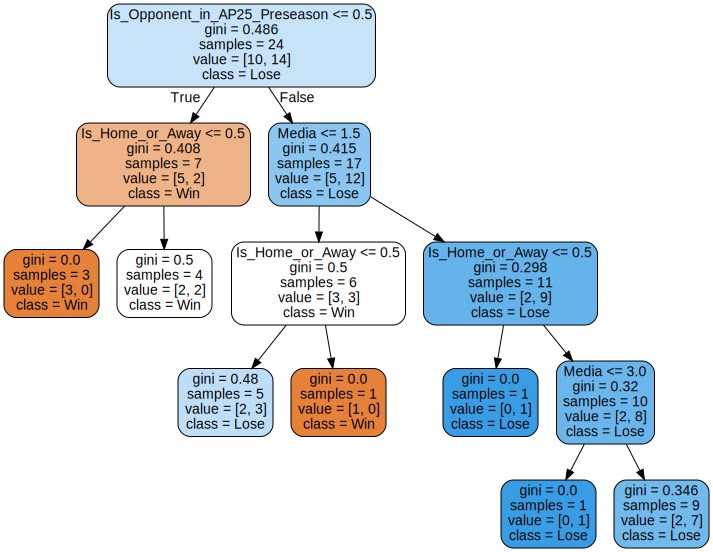

In [ ]:
import graphviz
dot_data = tree.export_graphviz(dt,feature_names=['Is_Home_or_Away','Is_Opponent_in_AP25_Preseason','Media'],
                                class_names=['Win', 'Lose'],
                                rounded=True,filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

Chuẩn bị dl_test:

In [ ]:
dfdata = pd.read_csv('/content/drive/MyDrive/fb_test.csv')

In [ ]:
dfdata= dfdata[['Is_Home_or_Away','Is_Opponent_in_AP25_Preseason','Media']]
print(dfdata)

   Is_Home_or_Away Is_Opponent_in_AP25_Preseason Media
0             Home                           Out   NBC
1             Home                            In   NBC
2             Away                           Out  ESPN
3             Away                           Out   FOX
4             Home                           Out   NBC
5             Away                           Out   ABC
6             Home                            In   NBC
7             Home                           Out   NBC
8             Home                           Out   NBC
9             Away                            In   ABC
10            Home                           Out   NBC
11            Away                            In   ABC


In [ ]:
dfdatat=dfdata[['Is_Home_or_Away','Is_Opponent_in_AP25_Preseason','Media']]
dfdatat['Is_Home_or_Away']=le.fit_transform(dfdatat['Is_Home_or_Away'])
dfdatat['Is_Opponent_in_AP25_Preseason']=le.fit_transform(dfdatat['Is_Opponent_in_AP25_Preseason'])
dfdatat['Media']=le.fit_transform(dfdatat['Media'])
print(dfdata)
print(dfdatat)


   Is_Home_or_Away Is_Opponent_in_AP25_Preseason Media
0             Home                           Out   NBC
1             Home                            In   NBC
2             Away                           Out  ESPN
3             Away                           Out   FOX
4             Home                           Out   NBC
5             Away                           Out   ABC
6             Home                            In   NBC
7             Home                           Out   NBC
8             Home                           Out   NBC
9             Away                            In   ABC
10            Home                           Out   NBC
11            Away                            In   ABC
    Is_Home_or_Away  Is_Opponent_in_AP25_Preseason  Media
0                 1                              1      3
1                 1                              0      3
2                 0                              1      1
3                 0                              1   

In [ ]:
pred=dt.predict(dfdatat)
for i in range (len(dfdata)):
  array_1d = dfdata.iloc[i, :].values.flatten()
  print("Pred: ",array_1d, " = ", pred[i])


Pred:  ['Home' 'Out' 'NBC']  =  Win
Pred:  ['Home' 'In' 'NBC']  =  Lose
Pred:  ['Away' 'Out' 'ESPN']  =  Win
Pred:  ['Away' 'Out' 'FOX']  =  Win
Pred:  ['Home' 'Out' 'NBC']  =  Win
Pred:  ['Away' 'Out' 'ABC']  =  Win
Pred:  ['Home' 'In' 'NBC']  =  Lose
Pred:  ['Home' 'Out' 'NBC']  =  Win
Pred:  ['Home' 'Out' 'NBC']  =  Win
Pred:  ['Away' 'In' 'ABC']  =  Lose
Pred:  ['Home' 'Out' 'NBC']  =  Win
Pred:  ['Away' 'In' 'ABC']  =  Lose


KNN:

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Iris.csv')
df.head()

In [ ]:
df=df.drop(columns=['Id'])

In [ ]:
df.head()

In [ ]:
#TO DISPLAY STATS ABOUT DATA
df.info()

In [ ]:
#CHECKING NULL VALUES
df.isnull().sum()

In [ ]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-virginica' ,'Iris-versicolor']

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
  plt.xlabel("SepalLength")
  plt.ylabel('SepalWidth')
  plt.legend()

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
  plt.xlabel("PetalLength")
  plt.ylabel('PetalWidth')
  plt.legend()

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
  plt.xlabel("SepalLength")
  plt.ylabel('PetalLength')
  plt.legend()

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
  plt.xlabel("SepalWidth")
  plt.ylabel('PetalWidth')
  plt.legend()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

In [ ]:
from sklearn.model_selection import train_test_split #train -70; test -30
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [ ]:
#knn - k-nearest neigthbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
print("Accuracy : ",model.score(x_test,y_test)*100)

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

Vẽ cofusion metric:

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

In [ ]:
#trực quan dl 2 tham số đầu vào
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2, X3, X4 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 2].min() - 1, stop = X_set.iloc[:, 2].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 3].min() - 1, stop = X_set.iloc[:, 3].max() + 1, step = 0.01))
plt.contourf(X1, X2,X3, X4, model.predict(np.array([X1.ravel(), X2.ravel(),X3.ravel(),X4.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'yellow'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('SepalWidth')
plt.ylabel('PetalWidth')
plt.legend()
plt.show()

# SVM: